# Step 1: Import package

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import tree

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [2]:
import os
import graphviz
from sklearn.tree import export_graphviz
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
# PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

In [3]:
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Step 2: Read data

In [4]:
# Read in muffin and cupcake ingredient data
df_recipes = pd.read_csv('/Users/pc/Downloads/recipes_muffins_cupcakes_scones.csv')
df_recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [5]:
df_recipes.loc[lambda d: d.Type=='Muffin','Type']=1
df_recipes.loc[lambda d: d.Type=='Cupcake','Type']=2
df_recipes.loc[lambda d: d.Type=='Scone','Type']=3

In [6]:
y=df_recipes['Type']
X=df_recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']]

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

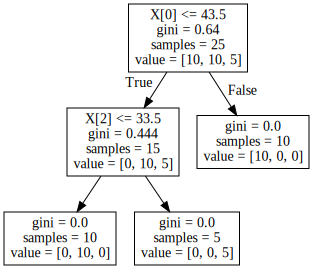

In [8]:
dot_data=export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [9]:
y=df_recipes['Type']
X=df_recipes[['Flour', 'Sugar', ]]

# Train and visualization

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

F:\Python\PythonA\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


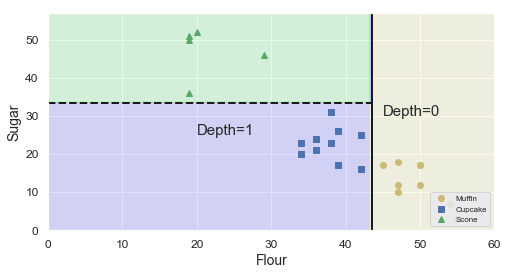

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, X['Flour'].max()+5, 0, X['Sugar'].max()+5], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "yo", label="Muffin")
        plt.plot(X.iloc[:, 0][y==2], X.iloc[:, 1][y==2], "bs", label="Cupcake")
        plt.plot(X.iloc[:, 0][y==3], X.iloc[:, 1][y==3], "g^", label="Scone")
        plt.axis(axes)
    if iris:
        plt.xlabel("Flour", fontsize=14)
        plt.ylabel("Sugar", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=8)

plt.figure(figsize=(8, 4))
plot_decision_boundary(clf, X, y,legend=True)
plt.plot([43.5, 43.5], [0, 60], "k-", linewidth=2)
plt.plot([0, 43.5], [33.5, 33.5], "k--", linewidth=2)

plt.text(45, 30, "Depth=0", fontsize=15)
plt.text(20, 25, "Depth=1", fontsize=15)


#save_fig("decision_tree_decision_boundaries_plot")
plt.show()